In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from preprocess import Preprocessing

/Users/domapetho/Documents/semester_1/ML/machinelearning-tuw/EX1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
pp = Preprocessing()
df = pp.load_data()

184-702-tu-ml-2025w-breast-cancer.zip: Skipping, found more recently modified local copy (use --force to force download)
Files extracted to: ./data_raw


In [ ]:
df.head()

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,8813129,False,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
1,898678,False,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
2,917896,False,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
3,869691,True,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
4,9110127,True,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


In [5]:
df.describe()

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,2.861498e+07,14.068674,19.116211,91.555053,649.617895,0.095851,0.102605,0.085587,0.047930,0.182908,...,16.214354,25.568737,106.866175,878.226316,0.131940,0.251042,0.263251,0.113729,0.291636,0.083341
std,1.204247e+08,3.486377,4.516754,24.028687,343.979266,0.013894,0.051422,0.075717,0.037409,0.028606,...,4.820742,6.318778,33.390308,572.257246,0.022377,0.153795,0.199783,0.067461,0.062957,0.016335
min,8.670000e+03,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.121500,...,7.930000,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.160300,0.058430
25%,8.711490e+05,11.690000,15.900000,74.680000,418.700000,0.086000,0.062190,0.026880,0.020690,0.162100,...,13.010000,20.720000,84.160000,515.300000,0.116600,0.141500,0.111700,0.064130,0.250600,0.071910
50%,9.065390e+05,13.280000,18.700000,86.100000,546.400000,0.095140,0.092280,0.061950,0.033260,0.181400,...,14.970000,25.410000,97.820000,684.500000,0.131200,0.215800,0.217700,0.099750,0.284100,0.079570
75%,8.811523e+06,16.070000,21.840000,105.800000,797.800000,0.105100,0.130400,0.122600,0.073400,0.197600,...,19.070000,30.280000,126.300000,1124.000000,0.144000,0.323500,0.382900,0.162800,0.319800,0.090750
max,9.113205e+08,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.410800,0.168900,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.901900,0.290300,0.577400,0.143100


The train dataset has 285 rows and 32 columns
Check for missing data:

In [6]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

The train dataset contains no missing data

Check the distribution of the target class

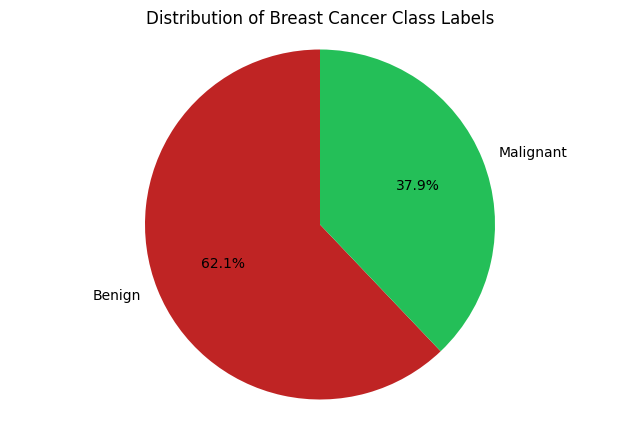

In [7]:
df['classLabel'] = df['class'].map({True : 'Malignant', False: 'Benign'})
target_counts = df['classLabel'].value_counts()
class_labels = target_counts.index.tolist()
sizes = target_counts.values

fig, ax = plt.subplots(figsize = (8,5))
ax.pie(
    sizes,
    labels = class_labels,
    startangle=90,
    colors=['#bf2424', '#24bf58'],
    autopct='%1.1f%%',
)

ax.set_title('Distribution of Breast Cancer Class Labels')
ax.axis('equal') 
plt.show()

Class imbalance occurs, as there ~1.6 times more benign labels, as malignant

Check for multicollinearity among the predictors

<Axes: >

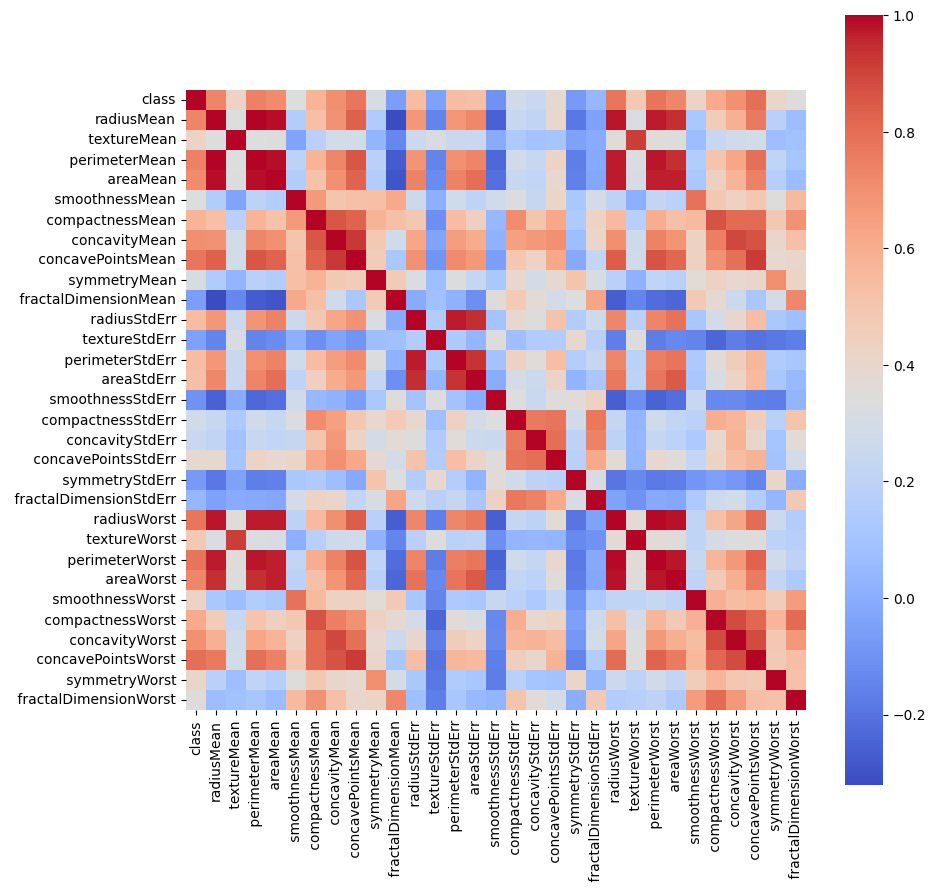

In [ ]:
df_corr = df.copy()
df_corr['class'] = df_corr['class'].map({True: 1, False: 0})
df_corr = df_corr.drop(['ID', 'classLabel'], axis=1)


corr_matrix = df_corr.corr()


plt.figure(figsize=(10, 10)) 
sns.heatmap(
    corr_matrix, 
    annot=False,     
    cmap='coolwarm',  
    square=True
)




In [ ]:
c = corr_matrix.abs().unstack()
so = c.sort_values(kind="quicksort", ascending=False)

so = so[so < 1.0]         
so = so.drop_duplicates()   

print(so.head(30))

--- Top 30 Most Correlated Feature Pairs ---
 perimeterMean       radiusMean             0.997917
 perimeterWorst       radiusWorst           0.994108
radiusMean            areaMean              0.986544
 areaMean             perimeterMean         0.985754
 areaWorst            radiusWorst           0.982171
                      perimeterWorst        0.976889
 perimeterWorst       perimeterMean         0.974502
radiusMean            radiusWorst           0.974413
 perimeterMean        radiusWorst           0.974166
 perimeterStdErr      radiusStdErr          0.972245
 radiusWorst          areaMean              0.971577
 perimeterWorst      radiusMean             0.969640
 areaMean             areaWorst             0.968140
 perimeterWorst       areaMean              0.967910
 areaStdErr           radiusStdErr          0.944433
 perimeterMean        areaWorst             0.943047
 areaWorst           radiusMean             0.942497
 perimeterStdErr      areaStdErr            0.936728
 

<Axes: >

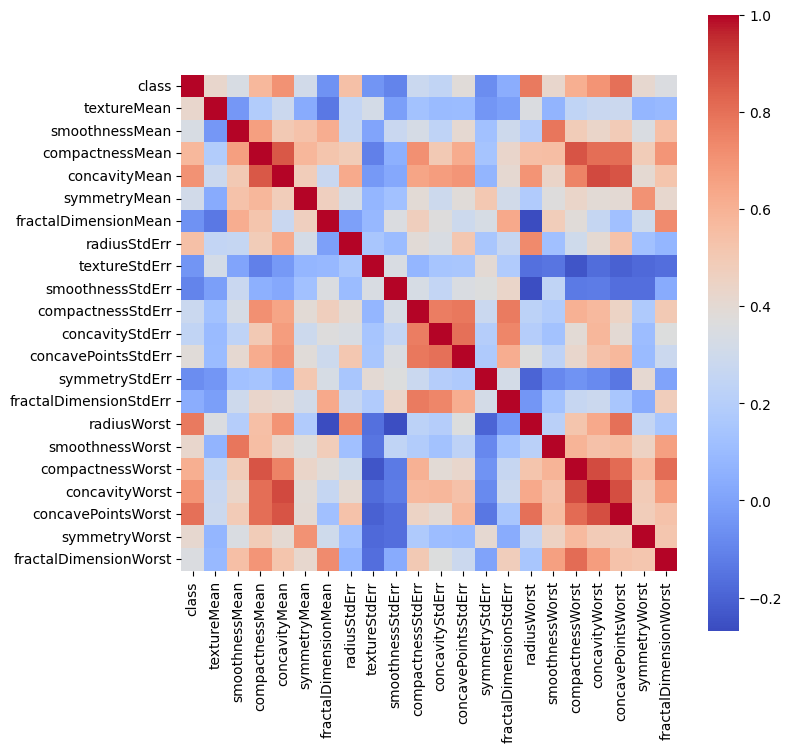

In [ ]:
df.columns = df.columns.str.strip()
df_clean = df.drop(columns=['perimeterMean', 'areaMean', 'perimeterWorst', 'areaWorst', 'perimeterStdErr', 'areaStdErr', 'concavePointsMean', 'textureWorst', 'radiusMean'], axis = 1)
#
df_corr_clean = df_clean.copy()
df_corr_clean['class'] = df_corr_clean['class'].map({True: 1, False: 0})
df_corr_clean = df_corr_clean.drop(['ID', 'classLabel'], axis=1)

corr_matrix = df_corr_clean.corr()

plt.figure(figsize=(8, 8)) 
sns.heatmap(
    corr_matrix, 
    annot=False,     
    cmap='coolwarm', 
    square=True
)


